# The QMCPY Plot Projection Function for Discrete Distribution and True Measure

This notebook demonstrates the different usages of the plot_proj function for Discrete Distribution and True Measure

A Discrete Distribution or True Measure object with d dimensions has a maximum of $d\times(d-1)$ dimensional pairings (for e.g: [2,3] and [3,2] are being considered seperate parings). The plot_proj function plots all or a subset of all the possible dimension pairings using the parameters d_vertical and d_horizontal and can also display extensibility based on the parameter n. Extensibility occurs when we want to plot the Discrete Distribution or True Measure Object with successively increasing numbers of points. Each set of points is displayed in a different color. This extensibility helps us see how the space fills up.

### Here we set up the QMCPY environment enabling us to utilize this function:

In [1]:
import qmcpy as qp

### Here we explain the parameters of the plot_proj function:

In [2]:
help(qp.plot_proj)

Help on function plot_proj in module qmcpy.util.plot_functions:

plot_proj(sampler, n=64, d_horizontal=1, d_vertical=2, math_ind=True, marker_size=5, figfac=5, fig_title='Projection of Samples', axis_pad=0, want_grid=True, font_family='sans-serif', where_title=0.951, **kwargs)
    Args:
        sampler: the Discrete Distribution or the True Measure Object to be plotted
        n (int or list): the number of samples or a list of samples(used for extensibility) to be plotted. 
            Default value is 64
        d_horizontal (int or list): the dimension or list of dimensions to be plotted on the horizontal axes. 
            Default value is 1 (1st dimension).
        d_vertical (int or list): the dimension or list of dimensions to be plotted on the vertical axes. 
            Default value is 2 (2nd dimension).
        math_ind : setting it true will enable user to pass in math indices. 
            Default value is true, so user is required to pass in math indices.
        marker_s

### The following examples show plotting of different Discrete Distribution Objects:

Here we show a two dimensional projection of an IID Object

We have given a more descriptive title.

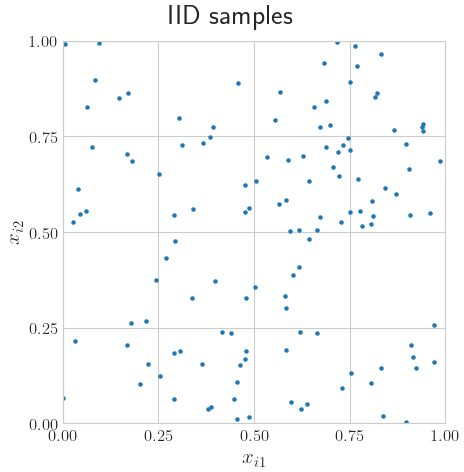

In [4]:
d = 2
iid = qp.IIDStdUniform(d)
fig,ax = qp.plot_proj(iid, n = 2**7, fig_title ="IID samples")

Here we show a two dimensional projection of an LD Halton object with successively increasing numbers of points.  The initial points are in blue. The next additional points are in orange. The final additional points are in green :

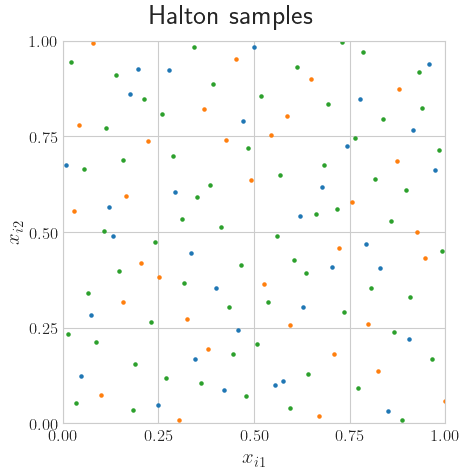

In [5]:
d = 4
halton = qp.Halton(d)
fig,ax = qp.plot_proj(halton, n = [2**5, 2**6, 2**7],fig_title ="Halton samples")

Here we show a four dimensional projection of a LD Digital Net Object :
We need to adjust the placement of the title.

We also turned off the grid

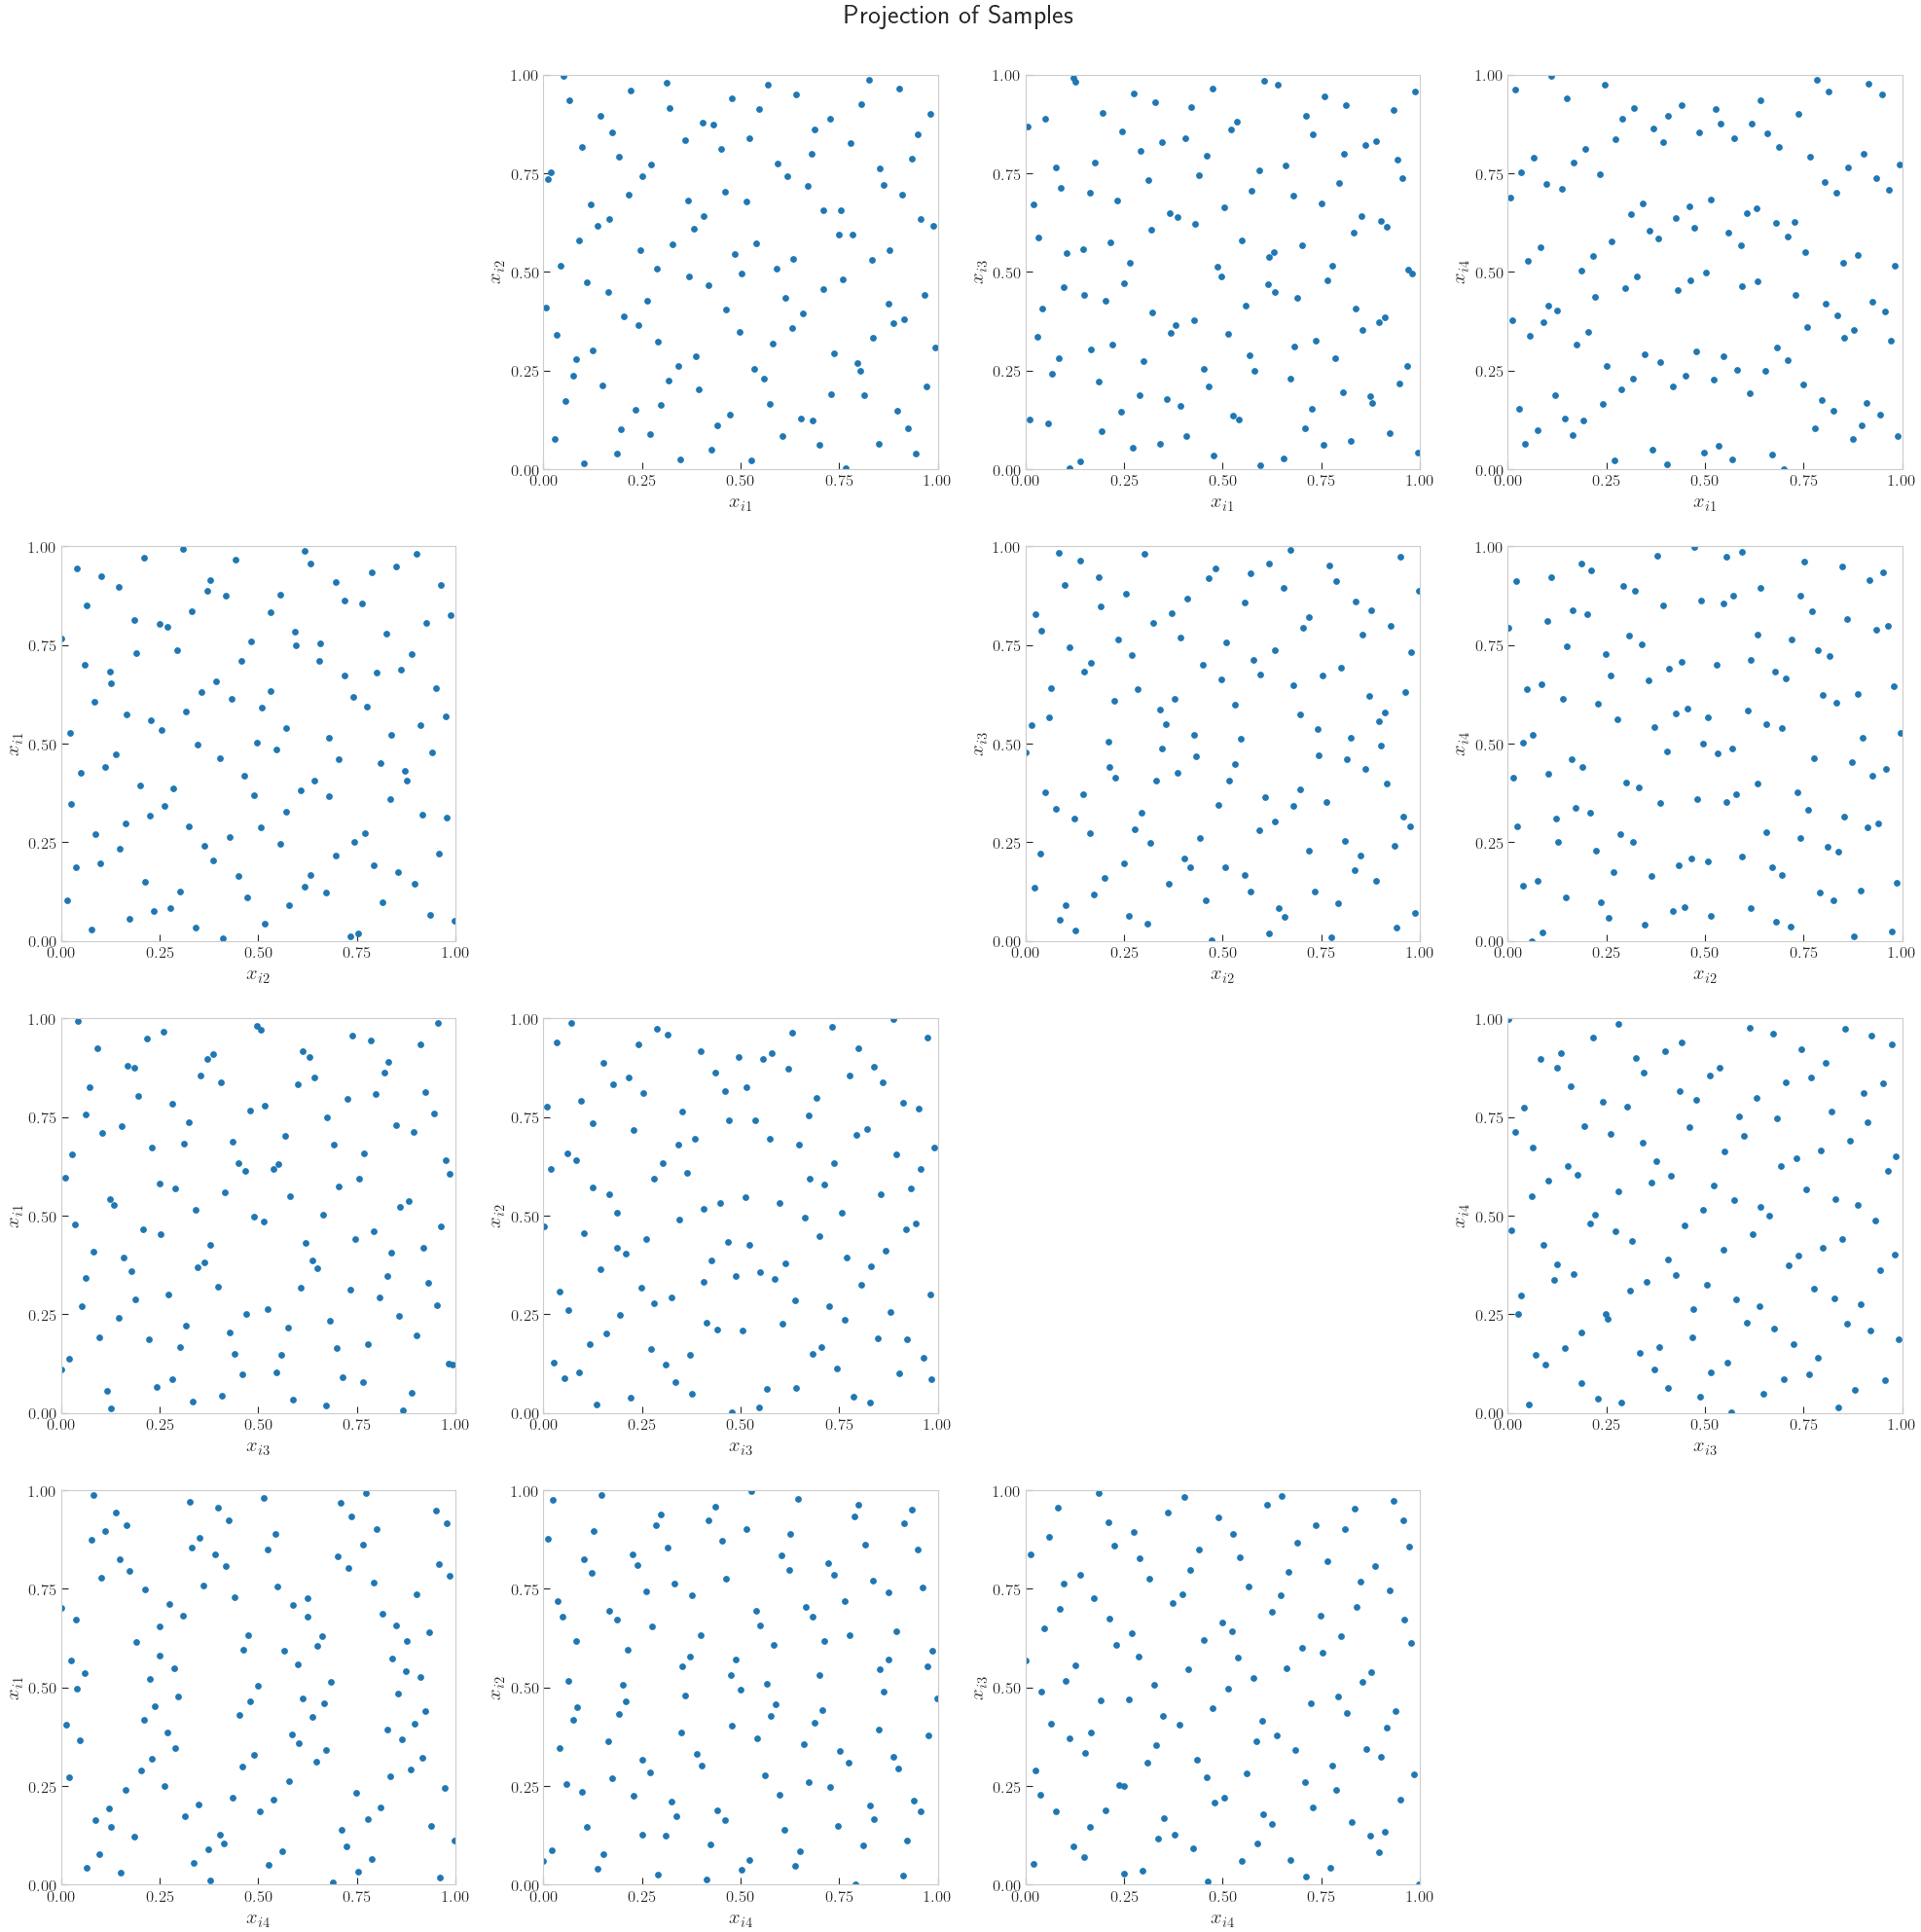

In [11]:
d = 4
net = qp.DigitalNetB2(d)
fig, ax = qp.plot_proj(net, n = 2**7, d_horizontal = range(d), d_vertical = range(d), math_ind = False, marker_size = 15, want_grid = False, where_title = 1)

Here we show certain specified dimensional projections (dimensions 1 and 3 on the x axis, dimensions 2 and 4 on the y axis) of a LD Digital Net Object:

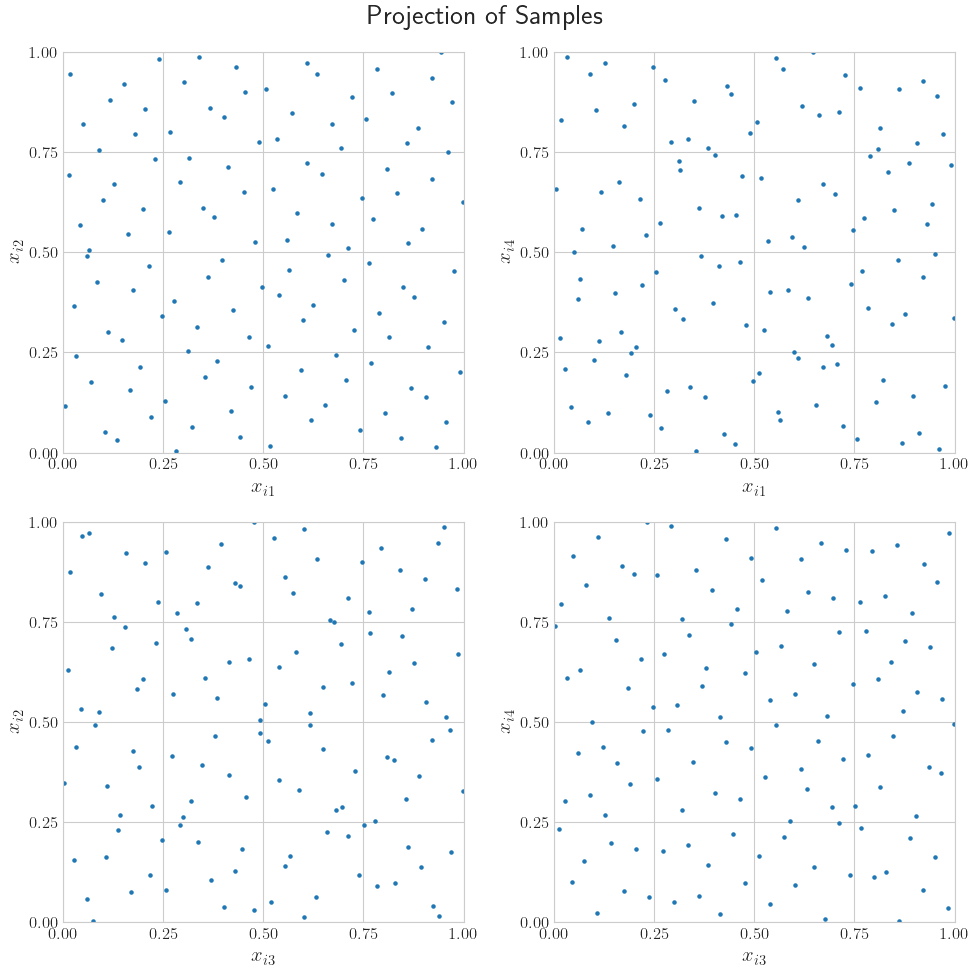

In [10]:
d = 4
net = qp.DigitalNetB2(d)
fig, ax = qp.plot_proj(net, n = 2**7, d_horizontal = [1,3], d_vertical = [2,4], where_title = 0.98)

Here we show a five dimensional projection of a LD Lattice object with successively increasing numbers of points.  The initial points are in blue. The next additional points are in orange. The final additional points are in green :

So that points near the boundary can be seen, we add some padding

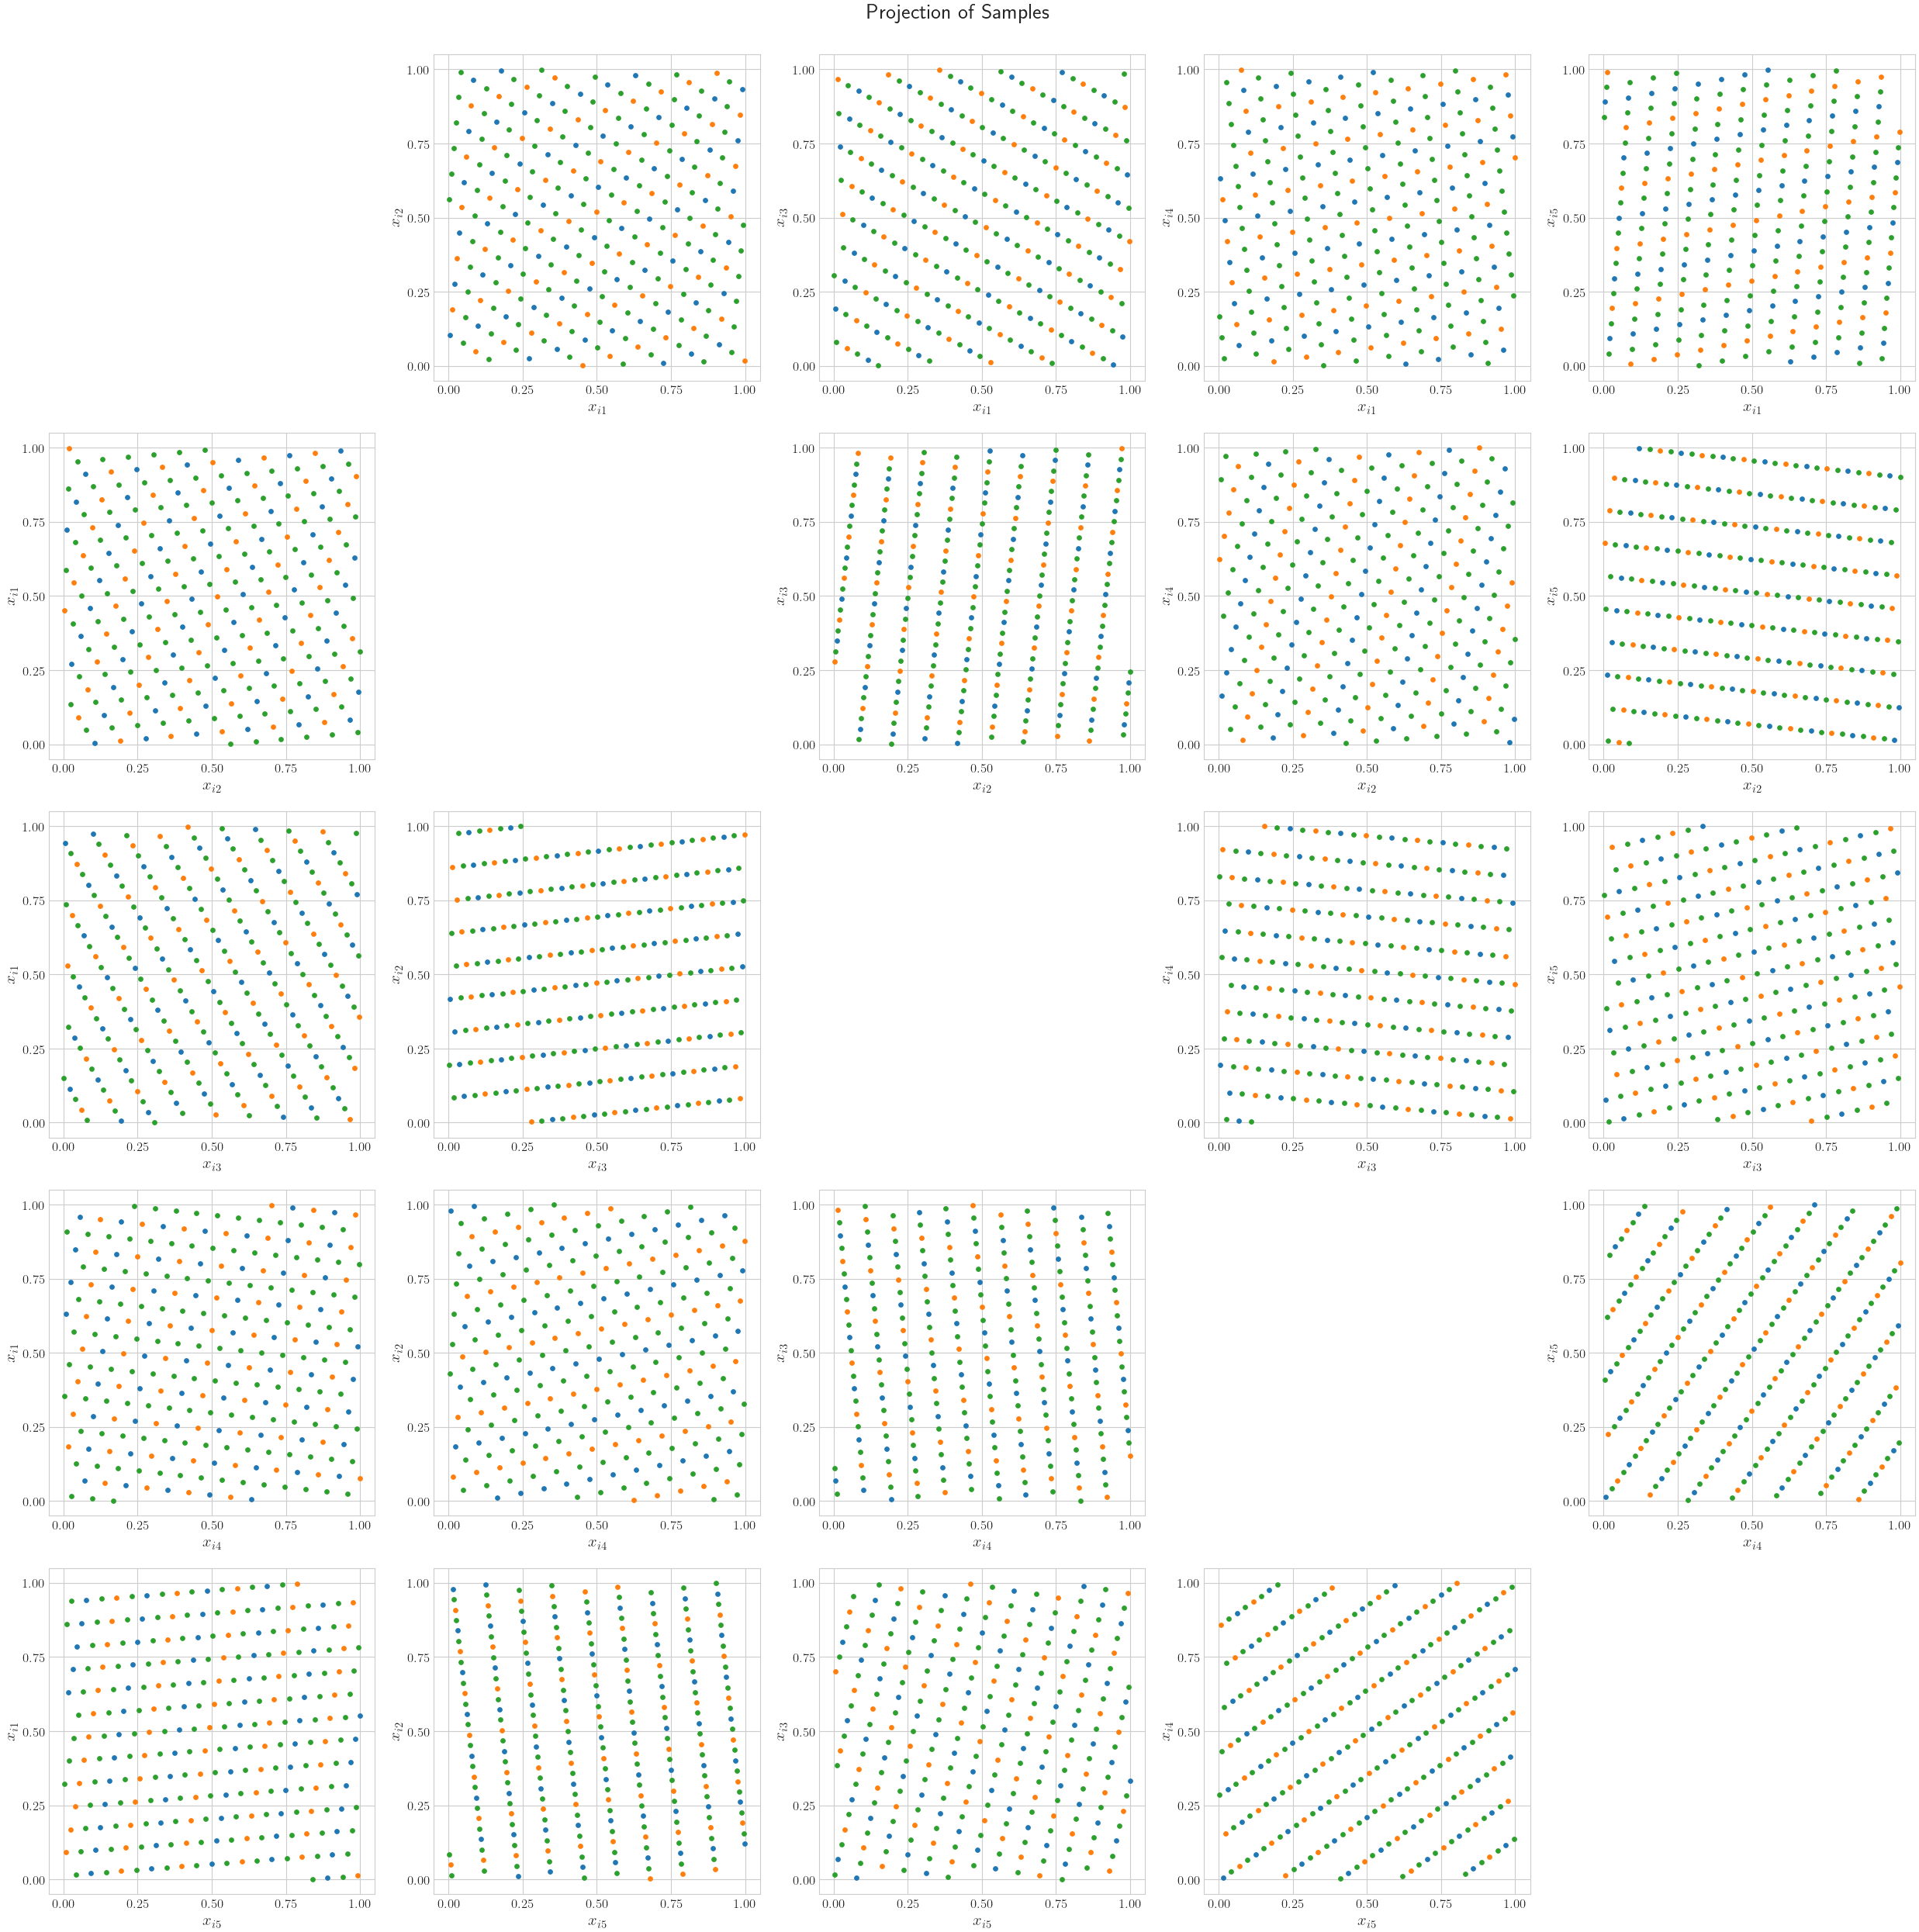

In [14]:
d = 5
lattice = qp.Lattice(d,generating_vector="https://raw.githubusercontent.com/QMCSoftware/LDData/refs/heads/kuo_lattice_dnet/lattice/kuo.lattice-33002-1024-1048576.9125.txt")
fig, ax = qp.plot_proj(lattice, n = [2**6, 2**7, 2**8], d_horizontal = range(d), d_vertical = range(d), math_ind = False, marker_size = 15, where_title = 1, axis_pad = 0.05)

### The following examples show plotting of different True Measure Objects:

Here we show a two dimensional projection of a Gaussian Object and how the axes returned by the plot_proj function can be manipulated by adding a horizontal and vertical line to denote the x and y axis respectively:

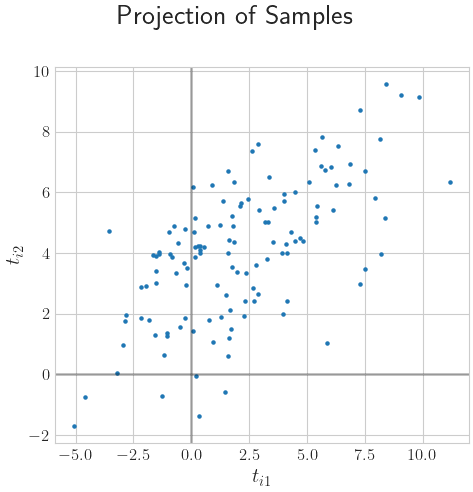

In [10]:
d = 2
iid = qp.IIDStdUniform(d)
iid_gaussian = qp.Gaussian(iid,mean =[2,4],covariance=[[9,4],[4,5]])
fig,ax = qp.plot_proj(iid_gaussian, n = 2**7)
ax[0,0].axvline(x=0,color= 'k',alpha=.25); #adding vertical line
ax[0,0].axhline(y=0,color= 'k',alpha=.25); #adding horizontal line

Here we show a two dimensional projection of a Gaussian Object with successively increasing numbers of points.  The initial points are in blue. The next additional points are in orange. The final additional points are in green :

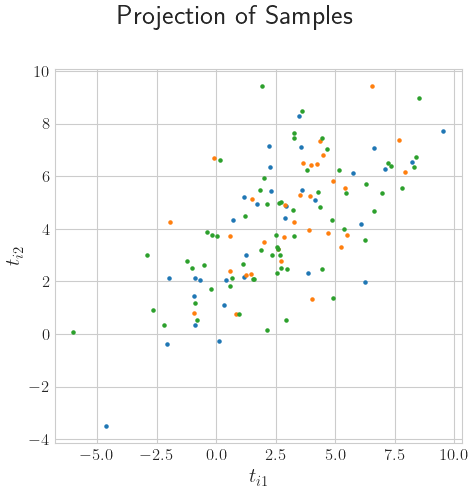

In [11]:
d = 2
iid = qp.IIDStdUniform(d)
iid_gaussian = qp.Gaussian(iid,mean =[2,4],covariance=[[9,4],[4,5]])
fig,ax = qp.plot_proj(iid_gaussian, n = [2**5,2**6,2**7])

Here we show a four dimensional projection of a SciPyWrapper Object:

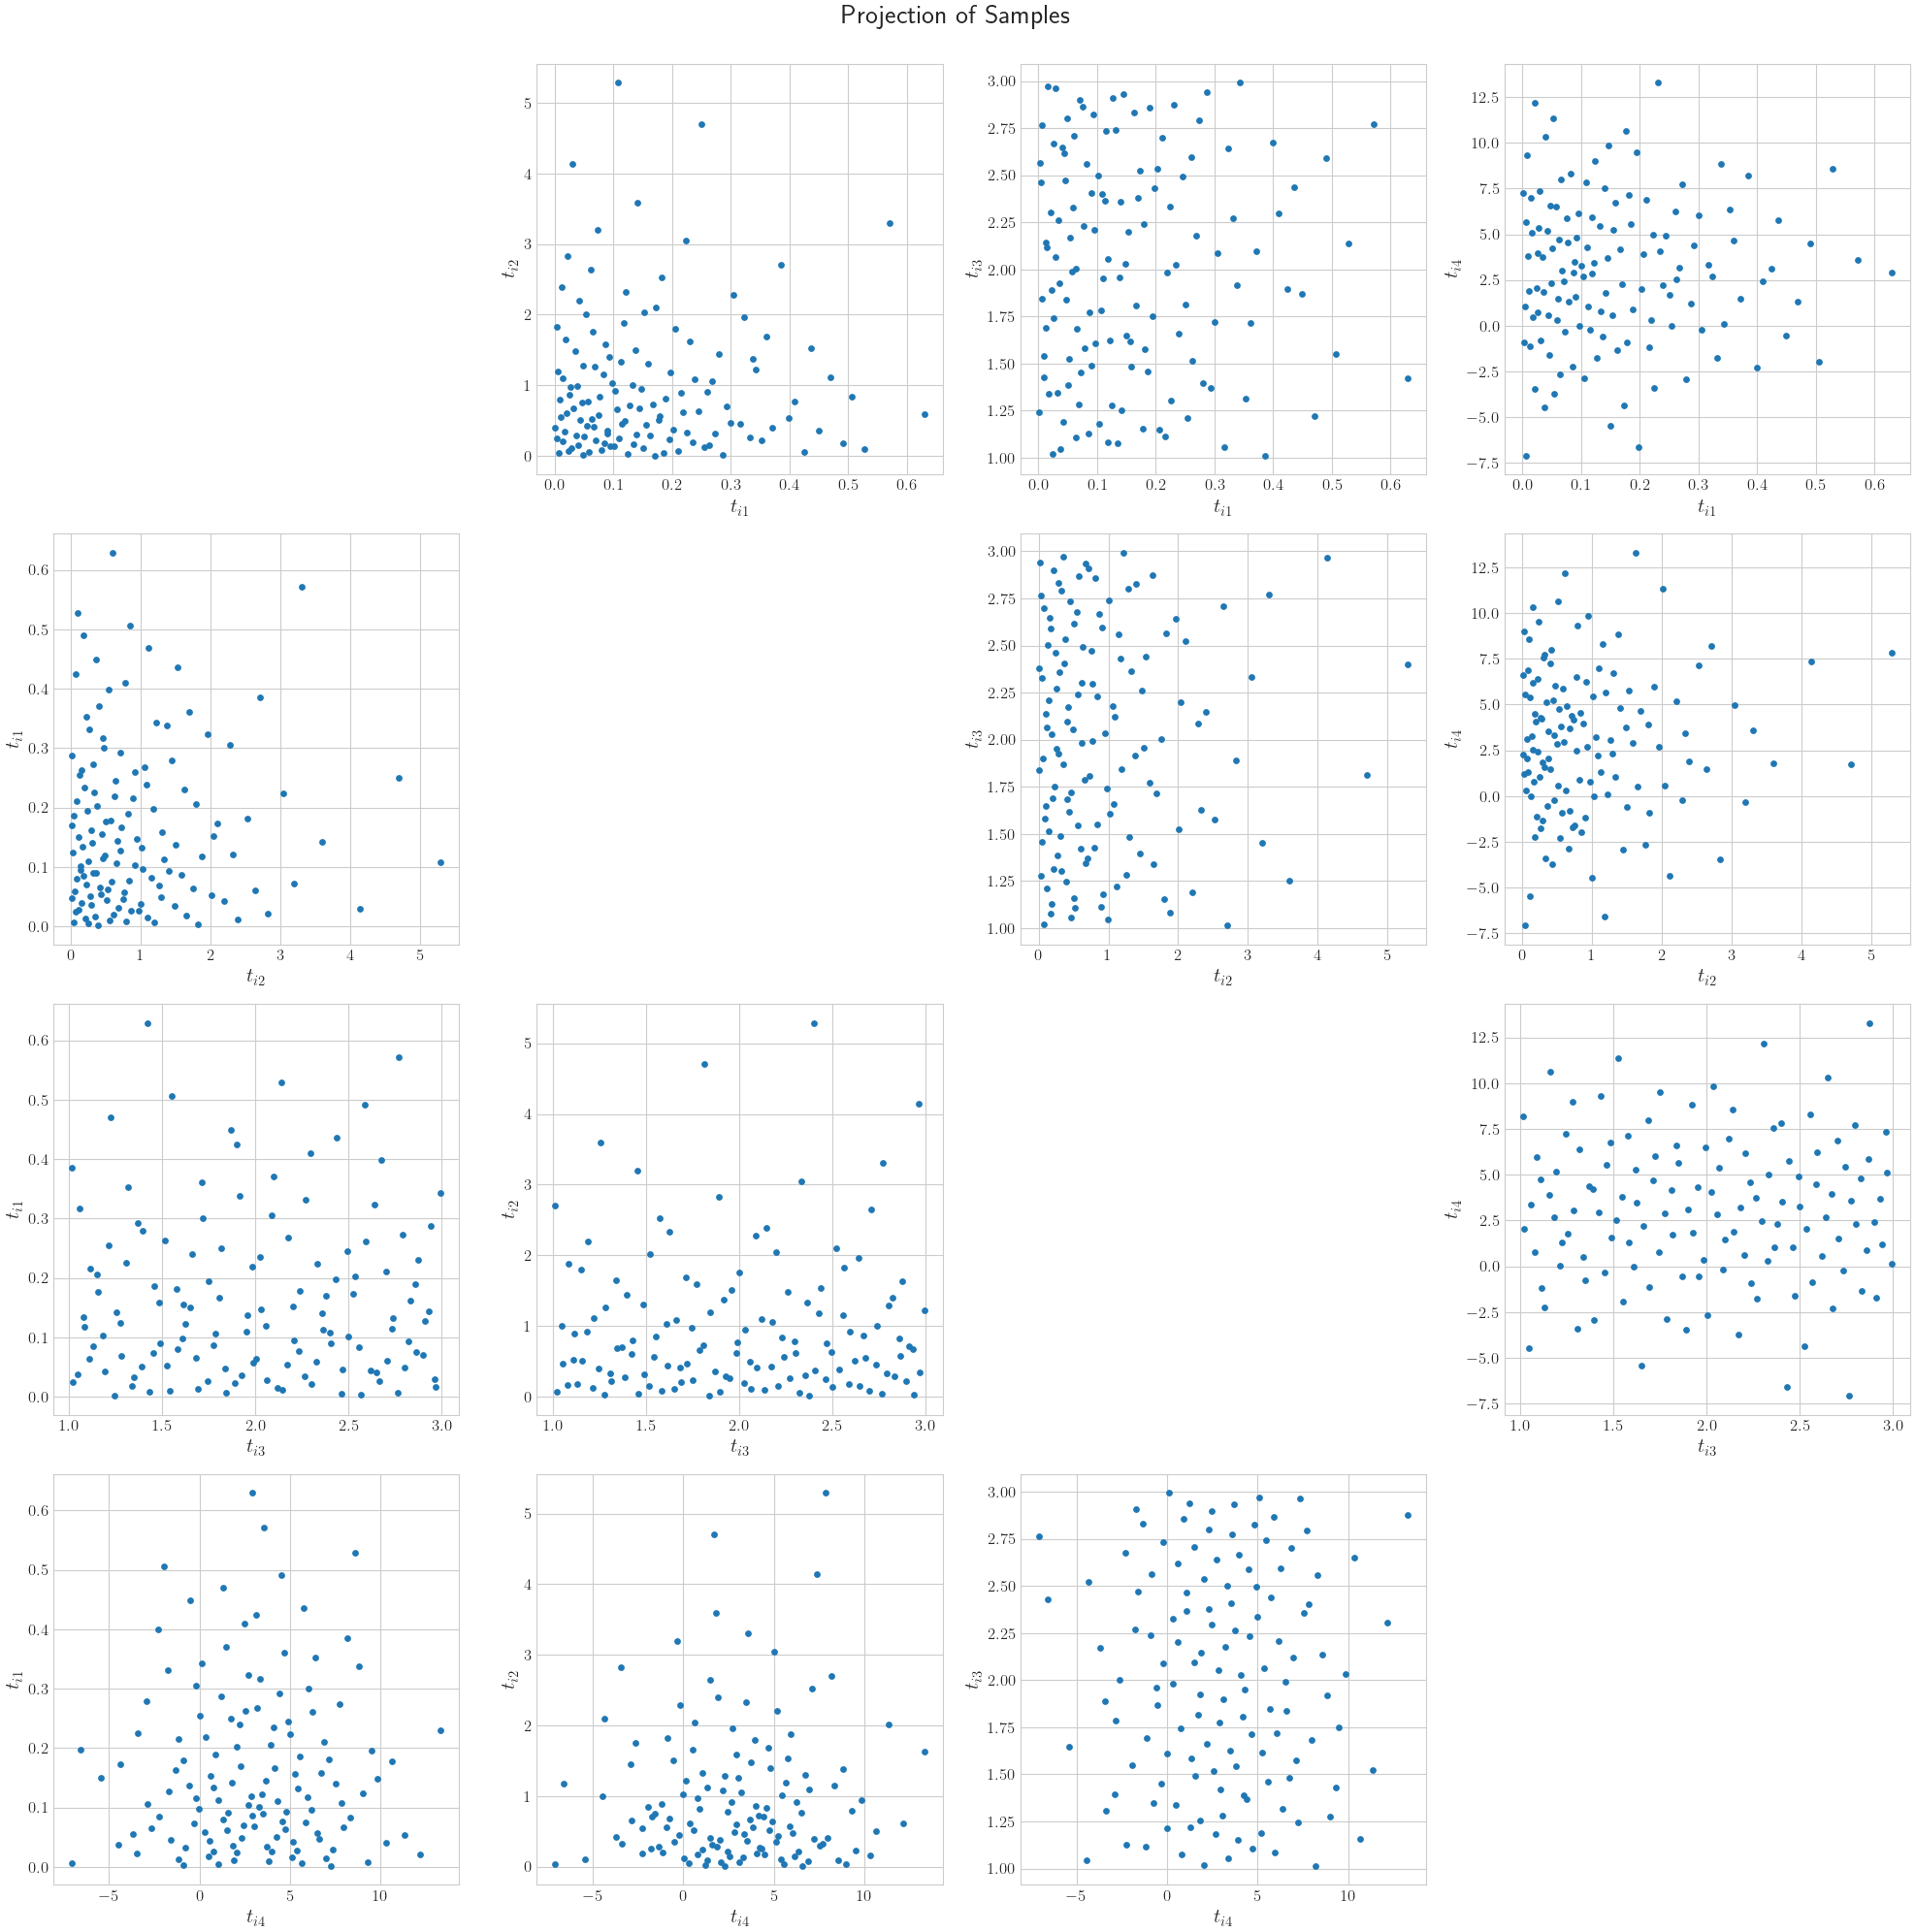

In [12]:
import scipy.stats
d = 4
net = qp.DigitalNetB2(d)
net_sci_py_wrapper = qp.SciPyWrapper(net,[scipy.stats.beta(a=1,b=5),scipy.stats.gamma(a=1),scipy.stats.uniform(loc = 1,scale = 2),scipy.stats.norm(loc = 3, scale = 4)])
fig, ax = qp.plot_proj(net_sci_py_wrapper, n = 2**7, d_horizontal = range(d), d_vertical = range(d), math_ind= False, marker_size = 15)

Here we show certain specified dimensional projections (dimensions 1 and 3 on the x axis, dimensions 2 and 4 on the y axis) of a SciPyWrapper Object:

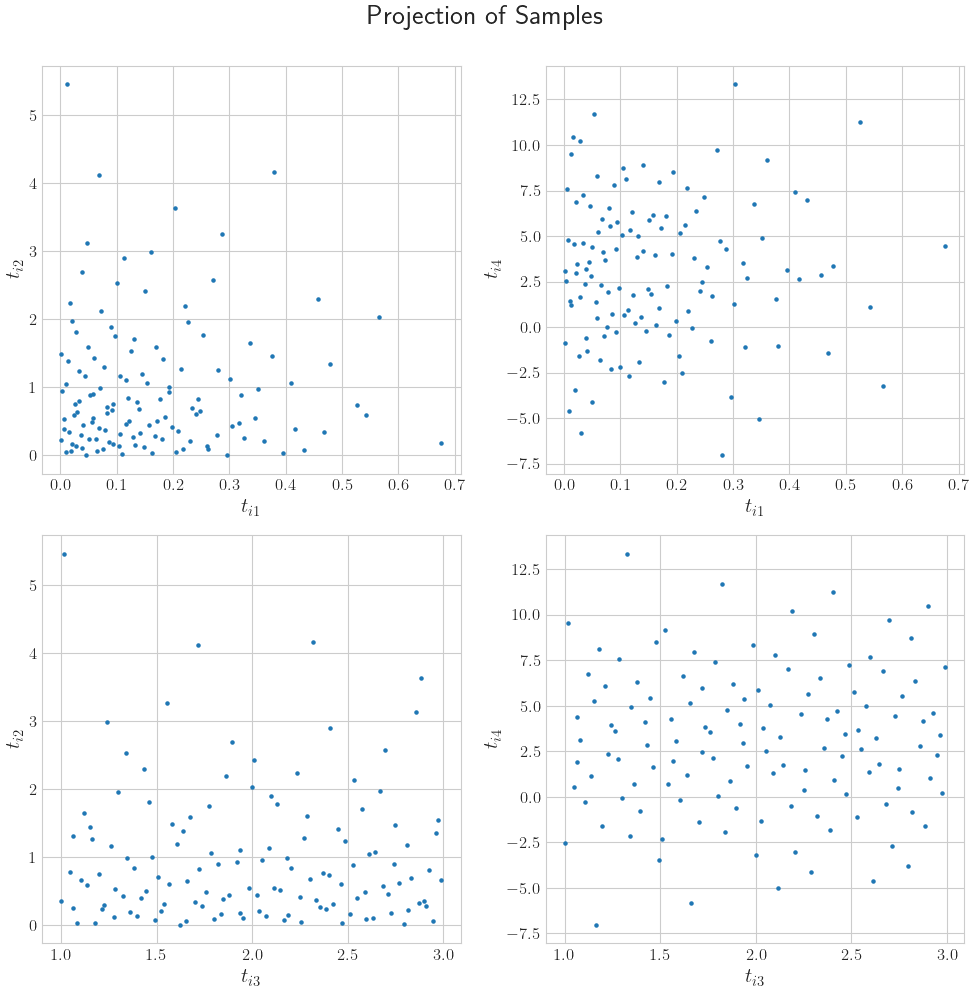

In [13]:
import scipy.stats
d = 4
net = qp.DigitalNetB2(d)
net_sci_py_wrapper = qp.SciPyWrapper(net,[scipy.stats.beta(a=1,b=5),scipy.stats.gamma(a=1),scipy.stats.uniform(loc = 1,scale = 2),scipy.stats.norm(loc = 3, scale = 4)])
fig, ax = qp.plot_proj(net_sci_py_wrapper, n = 2**7, d_horizontal = [1,3], d_vertical = [2,4])

Here we show a four dimensional projection of a Uniform object with successively increasing numbers of points.  The initial points are in blue. The next additional points are in orange. The final additional points are in green :

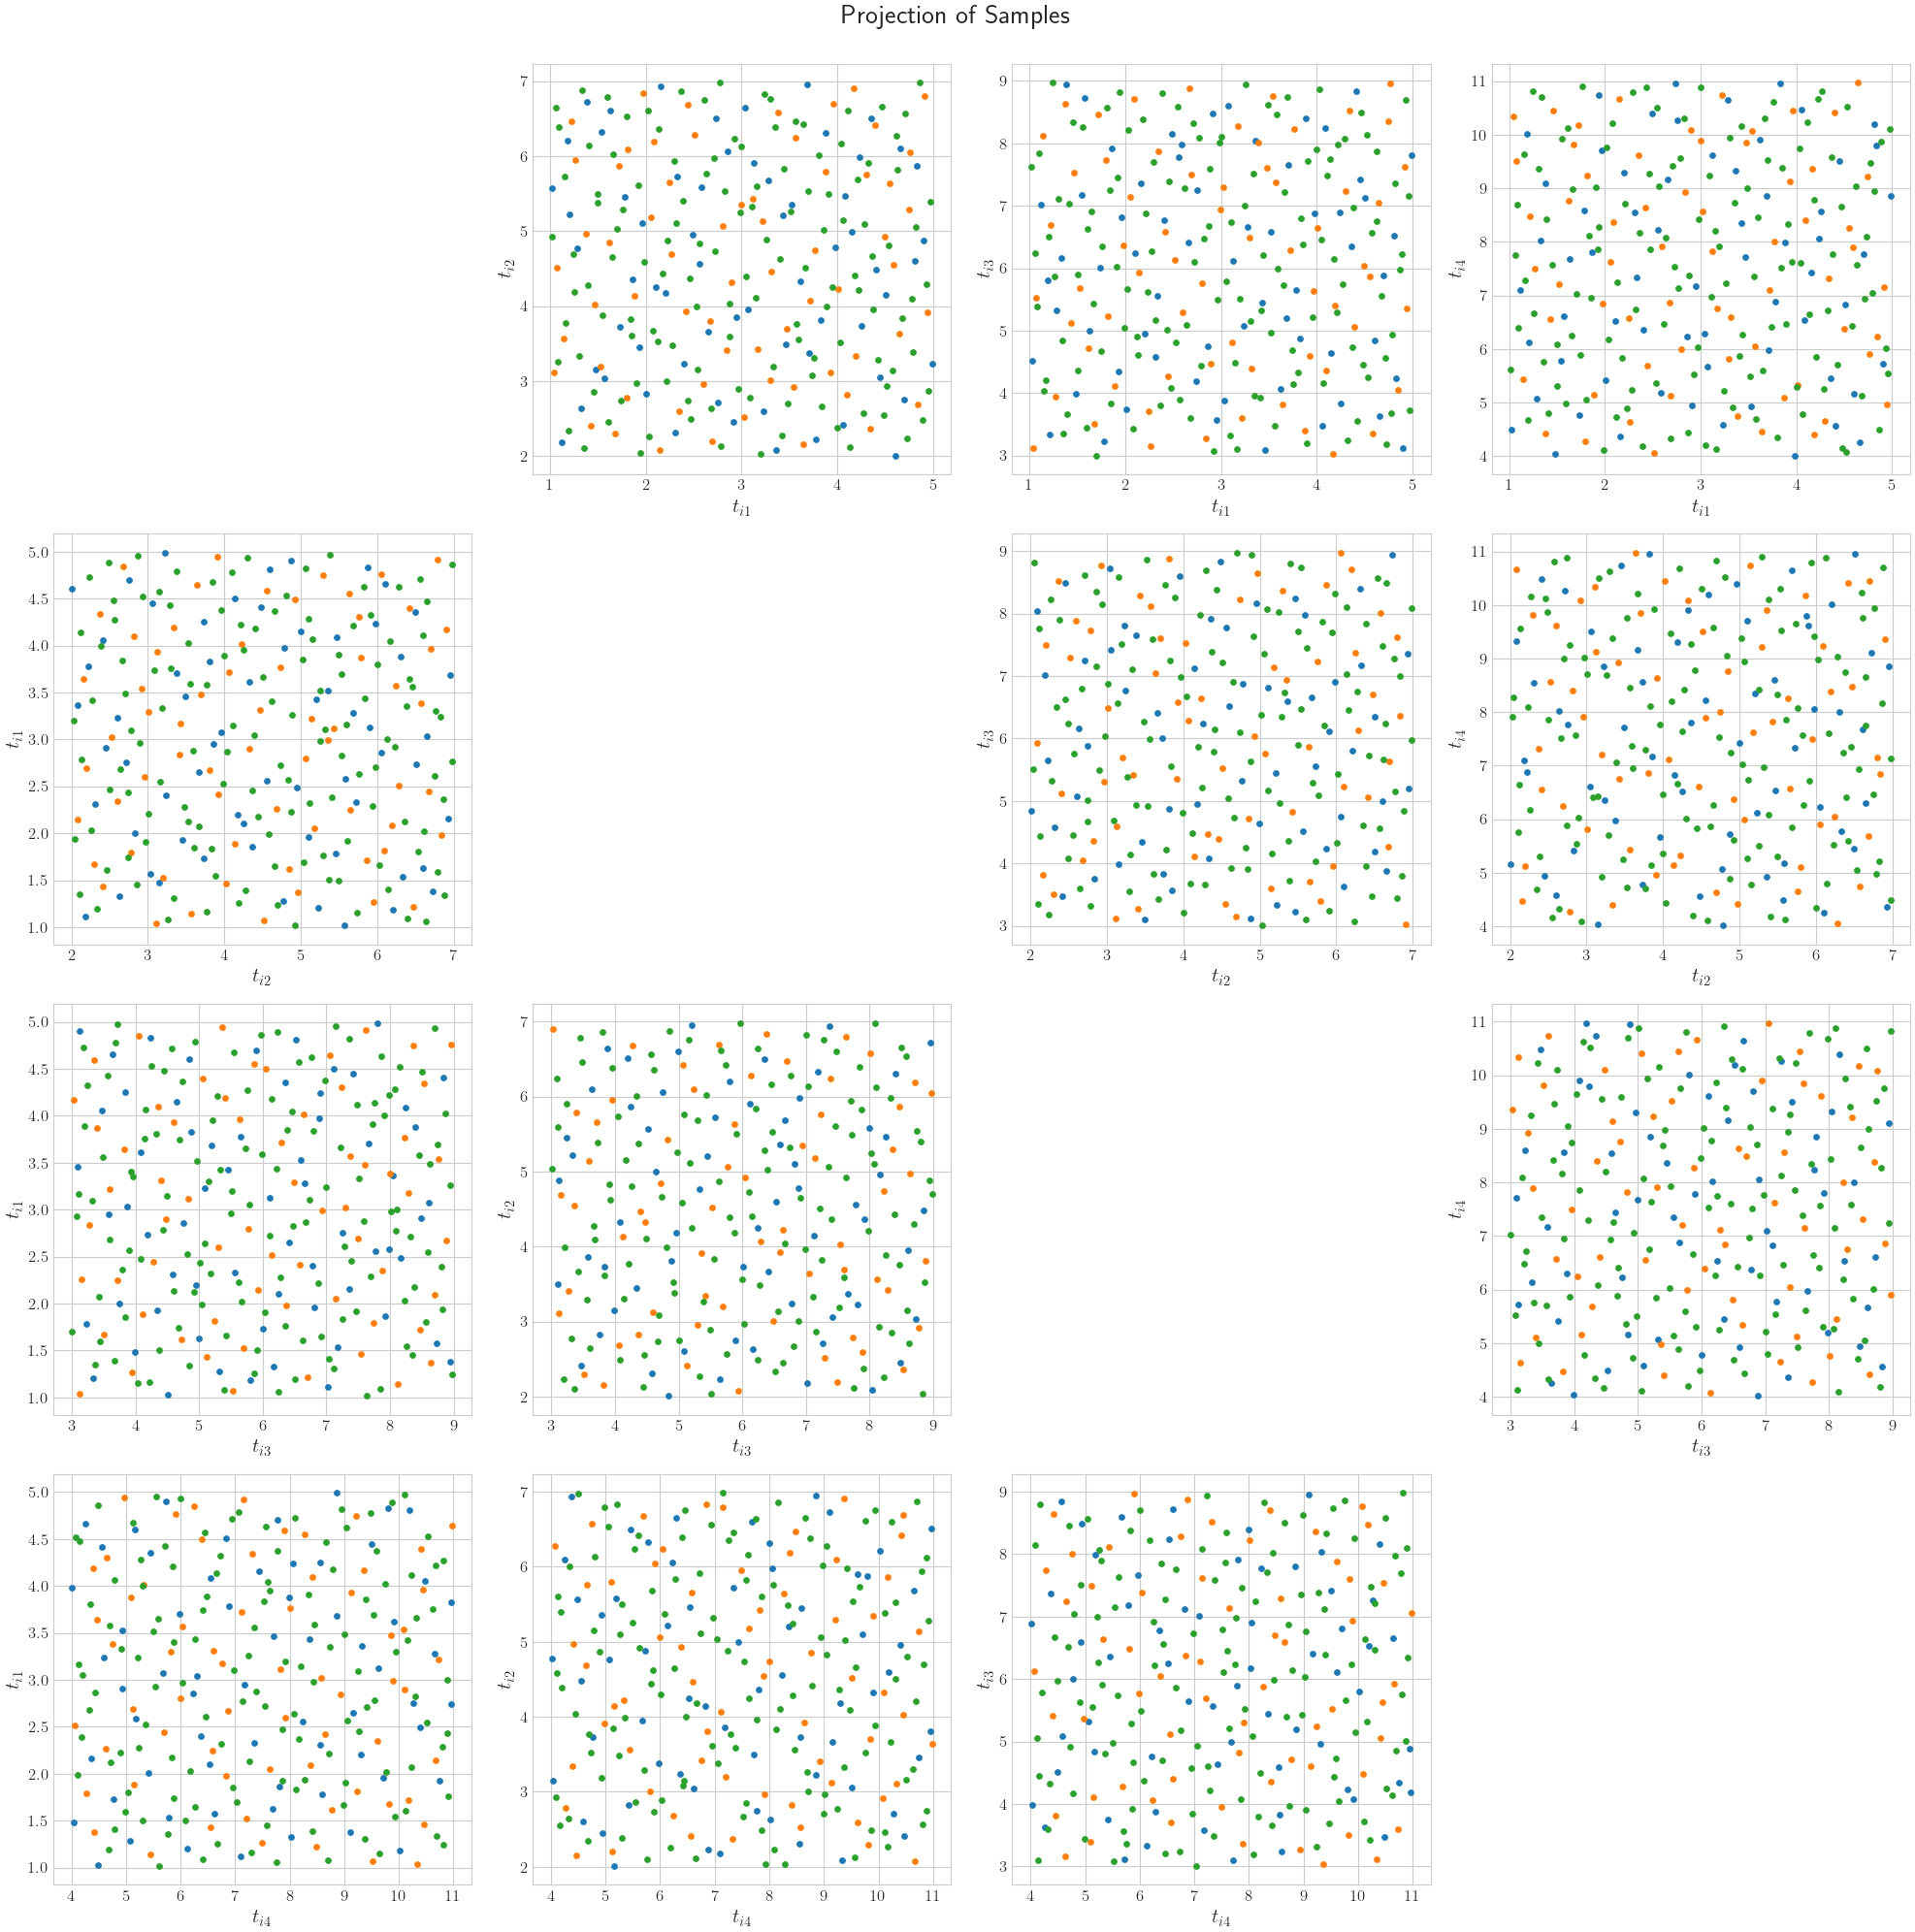

In [14]:
d = 4
halton = qp.Halton(d)
halton_uniform = qp.Uniform(halton,lower_bound=[1,2,3,4],upper_bound=[5,7,9,11])
fig, ax = qp.plot_proj(halton_uniform, n = [2**6, 2**7, 2**8], d_horizontal = range(d), d_vertical = range(d), math_ind = False, marker_size = 15)